# Problem 5.2

**"Silicon solar cells are going to be manufactured from a Czochralski-grown silicon ingot. To decide if the solar cells should have a full-square (FSQ) or pseudo-square (PSQ) geometry, the losses incurred in each case must be calculated. For this, plot, as a function of the solar cell side length, the percentage of silicon material lost and the percentage of panel surface lost (assume the distance between cells in the panel is negligible)."**

Note the large losses involved:
· Maximum silicon material loss fraction: 0.363
· Maximum panel area loss fraction: 0.215


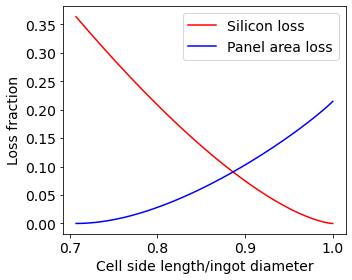

In [38]:
import math
import numpy as np
import matplotlib.pyplot as plt

DATA_SIZE = 200

# Previous data
ingot_D = 30  # Ingot diameter (cm). The results do not depend on this number, though!
# The maximum cell side length is the diameter of the ingot (round solar cell)
max_cell_sideL = ingot_D
# The smallest cell is inscribed in the original ingot, hence:
min_cell_sideL = ingot_D/math.sqrt(2)

# Silicon material volume lost
# Note that it is the same as area loss, since the ingot length is constant
Si_area_lost = np.zeros((DATA_SIZE,2))
# We compute the loss for a the range of possible cell side lengths
Si_area_lost[:,0] = np.linspace(min_cell_sideL, max_cell_sideL, DATA_SIZE)
# You can look up how the area of a circle sector is calculated. We calculate here 4 times that area
Si_area_lost[:,1] = (2/math.pi)*((2*np.arccos(Si_area_lost[:,0]/ingot_D)-np.sin(2*np.arccos(Si_area_lost[:,0]/ingot_D))))   

# Cell area lost in the final PV panel
Cell_area_lost = np.zeros((DATA_SIZE,2))
Cell_area_lost[:,0] = np.linspace(min_cell_sideL, max_cell_sideL, DATA_SIZE)
# We calculate it in steps.
# We need to calculate the area of the cropped corners in the cell
# Note this is the area of the cell square minus the area of the ingot circle cropped by the cell square 
# 1. Area of the cell square
Cell_area_lost[:,1] = Cell_area_lost[:,0]**2
# 2. Area of the full ingot section minus the cropped areas (calculated above)
Cell_area_lost[:,1] -= math.pi*(ingot_D/2)**2 
Cell_area_lost[:,1] += (0.5*ingot_D**2)*(2*np.arccos(Si_area_lost[:,0]/ingot_D)-np.sin(2*np.arccos(Si_area_lost[:,0]/ingot_D)))
# 3. Divide by the cell square area to obtain the fraction lost
Cell_area_lost[:,1] /= Cell_area_lost[:,0]**2   

Si_area_lost[:,0]/=ingot_D
Cell_area_lost[:,0]/=ingot_D

fig = plt.figure(figsize=[5,4], tight_layout=True)
ax = fig.add_subplot()    
ax.set_xlabel('Cell side length/ingot diameter', size=14)
ax.set_ylabel('Loss fraction', size=14)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

trace, = ax.plot(Si_area_lost[:,0], Si_area_lost[:,1], 'r-', label='Silicon loss' )
trace, = ax.plot(Cell_area_lost[:,0], Cell_area_lost[:,1], 'b-', label='Panel area loss' )

ax.legend(fontsize=14);

# Save figure
plt.savefig("fig_S5.X.png", dpi=300)

# Print results
print("Note the large losses involved:")
print("· Maximum silicon material loss fraction: " + str(f"{np.max(Si_area_lost[:,1]):.3}"))
print("· Maximum panel area loss fraction: " + str(f"{np.max(Cell_area_lost[:,1]):.3}"))
